# Data Cleaning


## Import

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import json

drive.mount('/content/drive')
column_n = ['NewsId', 'Category', 'SubCat', 'Title', 'Abstract', 'url', 'TitleEnt', 'AbstractEnt']
column_b = ['ImpressionId', 'UserId', 'Time', 'History', 'Impressions']

# import the datasets
test_n_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_test/news.tsv', sep='\t', header=None, names=column_n)
test_b_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_test/behaviors.tsv', sep='\t', header=None, names=column_b)
train_n_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_train/news.tsv', sep='\t', header=None, names=column_n)
train_b_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_train/behaviors.tsv', sep='\t', header=None, names=column_b)
valid_n_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_valid/news.tsv', sep='\t', header=None, names=column_n)
valid_b_df = pd.read_csv('/content/drive/MyDrive/MSNEWS/MIND_valid/behaviors.tsv', sep='\t', header=None, names=column_b)

Mounted at /content/drive


Check the information of the datasets.

In [3]:
test_n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120959 entries, 0 to 120958
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   NewsId       120959 non-null  object
 1   Category     120959 non-null  object
 2   SubCat       120959 non-null  object
 3   Title        120959 non-null  object
 4   Abstract     114256 non-null  object
 5   url          120958 non-null  object
 6   TitleEnt     120953 non-null  object
 7   AbstractEnt  120950 non-null  object
dtypes: object(8)
memory usage: 7.4+ MB


In [4]:
train_n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   NewsId       101527 non-null  object
 1   Category     101527 non-null  object
 2   SubCat       101527 non-null  object
 3   Title        101527 non-null  object
 4   Abstract     96112 non-null   object
 5   url          101527 non-null  object
 6   TitleEnt     101524 non-null  object
 7   AbstractEnt  101521 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


In [5]:
valid_n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72023 entries, 0 to 72022
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NewsId       72023 non-null  object
 1   Category     72023 non-null  object
 2   SubCat       72023 non-null  object
 3   Title        72023 non-null  object
 4   Abstract     68400 non-null  object
 5   url          72023 non-null  object
 6   TitleEnt     72021 non-null  object
 7   AbstractEnt  72018 non-null  object
dtypes: object(8)
memory usage: 4.4+ MB


In [6]:
test_b_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370727 entries, 0 to 2370726
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   ImpressionId  2370727 non-null  int64 
 1   UserId        2370727 non-null  object
 2   Time          2370727 non-null  object
 3   History       2341619 non-null  object
 4   Impressions   2370727 non-null  object
dtypes: int64(1), object(4)
memory usage: 90.4+ MB


In [7]:
train_b_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232748 entries, 0 to 2232747
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   ImpressionId  2232748 non-null  int64 
 1   UserId        2232748 non-null  object
 2   Time          2232748 non-null  object
 3   History       2186683 non-null  object
 4   Impressions   2232748 non-null  object
dtypes: int64(1), object(4)
memory usage: 85.2+ MB


In [8]:
valid_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376471 entries, 0 to 376470
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ImpressionId  376471 non-null  int64 
 1   UserId        376471 non-null  object
 2   Time          376471 non-null  object
 3   History       365201 non-null  object
 4   Impressions   376471 non-null  object
dtypes: int64(1), object(4)
memory usage: 14.4+ MB


Now, let's have a preview of our data.

In [9]:
test_n_df.head()

,NewsId,Category,SubCat,Title,Abstract,url,TitleEnt,AbstractEnt
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [10]:
test_b_df.head()

,ImpressionId,UserId,Time,History,Impressions
0,1,U64099,11/19/2019 11:37:45 AM,N121133 N104200 N43255 N55860 N128965 N38014 N...,N101071 N15647 N83400 N124838 N57092 N64623 N6...
1,2,U231077,11/19/2019 5:28:08 AM,N45124 N84730 N45128 N104312 N70022 N99111 N26...,N14657 N51253 N49521 N126571 N74286 N101071 N1...
2,3,U606012,11/19/2019 4:46:23 AM,N59893 N84662 N90686 N33265 N127225 N120859 N6...,N74286 N9250 N26898 N123737 N98301 N80580 N456...
3,4,U320649,11/21/2019 6:03:51 AM,N110863 N7889 N86335 N85056 N115743 N63372 N19...,N119559 N37657 N108085 N91287 N39136 N130190 N...
4,5,U357840,11/22/2019 10:36:19 AM,N98596 N85005 N15713 N67779 N47961 N55571 N666...,N60658 N43496 N65220 N9125 N63136 N83728 N3208...


Check the unique values in the columns.

In [11]:
test_b_df['UserId'].nunique()

702005

In [12]:
print(test_n_df['Category'].unique(), test_n_df['SubCat'].nunique())
print(train_n_df['Category'].unique(), train_n_df['SubCat'].nunique())
print(valid_n_df['Category'].unique(), valid_n_df['SubCat'].nunique())

['lifestyle' 'news' 'health' 'sports' 'weather' 'entertainment'
 'foodanddrink' 'autos' 'travel' 'video' 'finance' 'tv' 'movies' 'music'
 'kids' 'middleeast' 'games' 'northamerica'] 290
['lifestyle' 'news' 'health' 'sports' 'weather' 'entertainment'
 'foodanddrink' 'autos' 'travel' 'video' 'finance' 'tv' 'movies' 'music'
 'kids' 'middleeast' 'games' 'northamerica'] 285
['lifestyle' 'health' 'news' 'sports' 'weather' 'entertainment'
 'foodanddrink' 'autos' 'travel' 'video' 'tv' 'finance' 'movies' 'music'
 'kids' 'middleeast' 'games'] 269


In [13]:
# Check duplicates
duplicates = train_b_df.duplicated()
has = duplicates.any()
print(has)

False


## Cleaning

### Drop URL & Impression

Drop the columns that we will not use in our analysis.

In [14]:
test_n_df = test_n_df.drop('url', axis=1)
train_n_df = train_n_df.drop('url', axis=1)
valid_n_df = valid_n_df.drop('url', axis=1)

In [15]:
test_b_df1 = test_b_df.drop('Impressions', axis=1)
train_b_df1 = train_b_df.drop('Impressions', axis=1)
valid_b_df1 = valid_b_df.drop('Impressions', axis=1)

test_b_df1

,ImpressionId,UserId,Time,History
0,1,U64099,11/19/2019 11:37:45 AM,N121133 N104200 N43255 N55860 N128965 N38014 N...
1,2,U231077,11/19/2019 5:28:08 AM,N45124 N84730 N45128 N104312 N70022 N99111 N26...
2,3,U606012,11/19/2019 4:46:23 AM,N59893 N84662 N90686 N33265 N127225 N120859 N6...
3,4,U320649,11/21/2019 6:03:51 AM,N110863 N7889 N86335 N85056 N115743 N63372 N19...
4,5,U357840,11/22/2019 10:36:19 AM,N98596 N85005 N15713 N67779 N47961 N55571 N666...
...,...,...,...,...
2370722,2370723,U584874,11/21/2019 6:35:29 AM,N72571 N14240 N26193 N82055 N23920 N41710
2370723,2370724,U584857,11/22/2019 7:13:47 AM,N57191 N54360 N1596 N61590 N104737 N71977 N773...
2370724,2370725,U160629,11/20/2019 10:38:57 PM,N105366 N51167 N66294 N71092 N92463 N38171 N11...
2370725,2370726,U406290,11/21/2019 8:24:26 AM,N55903 N85484 N12015 N121551 N65119 N15471 N11...


### Take Sample

Since we have a very large dataset, we would take a sample on users to study their behaviors.

In [16]:
unique_users = test_b_df1['UserId'].unique()
sampled_users = pd.Series(unique_users).sample(frac=0.01, random_state=42)
sampled_test = test_b_df1[test_b_df1['UserId'].isin(sampled_users)]

sampled_test

,ImpressionId,UserId,Time,History
7,8,U84394,11/18/2019 1:43:17 PM,N54656 N128643 N92838 N106692 N50914 N119997 N...
52,53,U571456,11/22/2019 7:18:21 PM,N118005 N86208 N82746 N90939 N52435 N98214 N97...
54,55,U335328,11/16/2019 4:47:52 PM,N62205 N35278 N13996 N65757 N90507 N109238 N94...
58,59,U66995,11/19/2019 12:18:41 PM,N63092 N85659 N65119 N73122 N51724 N120705 N45...
158,159,U524661,11/22/2019 9:52:11 AM,N77001 N128643 N112196 N98238 N130269 N85056 N...
...,...,...,...,...
2370487,2370488,U606058,11/17/2019 9:45:53 PM,N41122 N39472 N4833 N9740 N65259 N5128 N19474 ...
2370491,2370492,U666365,11/17/2019 7:41:26 AM,N39472 N86208 N82753 N76065 N121944 N114156 N3...
2370493,2370494,U76422,11/20/2019 5:02:05 PM,N102357 N21710 N9276 N86141 N51893 N93049 N127...
2370651,2370652,U217845,11/21/2019 11:17:57 AM,N23891 N9375 N63676 N87446 N121551 N130260 N49...


In [17]:
print(sampled_test['UserId'].nunique(), test_b_df1['UserId'].nunique())

7020 702005


### Split History

To better understand the user behaviors, we explode the 'History' column.

In [18]:
# Split the column then explode
sampled_test['History'] = sampled_test['History'].str.split(' ')
exploded_test = sampled_test.explode('History')

In [19]:
exploded_test.info(null_counts=True)
exploded_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009992 entries, 7 to 2370713
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   ImpressionId  1009992 non-null  int64 
 1   UserId        1009992 non-null  object
 2   Time          1009992 non-null  object
 3   History       1009682 non-null  object
dtypes: int64(1), object(3)
memory usage: 38.5+ MB


,ImpressionId,UserId,Time,History
7,8,U84394,11/18/2019 1:43:17 PM,N54656
7,8,U84394,11/18/2019 1:43:17 PM,N128643
7,8,U84394,11/18/2019 1:43:17 PM,N92838
7,8,U84394,11/18/2019 1:43:17 PM,N106692
7,8,U84394,11/18/2019 1:43:17 PM,N50914


# EDA

To better understand the datasets, we will explore some of the features.

## Time Analysis

To understand at what time the users would like to read news the most, we add a column of 'Time_of_Day' by splitting time into four time frames, and study the user behaviors.

In [20]:
# Transform the column to datetime
sampled_test['Time'] = pd.to_datetime(sampled_test['Time'])

# Assign each time a time of day
def assign_time_of_day(hour):
    if 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    elif 18 <= hour <= 23:
        return 'evening'
    else:
        return 'night'

sampled_test['Time_of_Day'] = sampled_test['Time'].dt.hour.apply(lambda x: assign_time_of_day(x))

In [21]:
sampled_test.head()

,ImpressionId,UserId,Time,History,Time_of_Day
7,8,U84394,2019-11-18 13:43:17,"[N54656, N128643, N92838, N106692, N50914, N11...",afternoon
52,53,U571456,2019-11-22 19:18:21,"[N118005, N86208, N82746, N90939, N52435, N982...",evening
54,55,U335328,2019-11-16 16:47:52,"[N62205, N35278, N13996, N65757, N90507, N1092...",afternoon
58,59,U66995,2019-11-19 12:18:41,"[N63092, N85659, N65119, N73122, N51724, N1207...",afternoon
158,159,U524661,2019-11-22 09:52:11,"[N77001, N128643, N112196, N98238, N130269, N8...",morning


In [22]:
# Count the value of each time frame
sampled_test['Time_of_Day'].value_counts()

morning      10667
afternoon     7803
night         3036
evening       2382
Name: Time_of_Day, dtype: int64

In [23]:
# Check the time range of the dataset
earliest = sampled_test['Time'].min()
latest = sampled_test['Time'].max()
print(earliest, latest)

2019-11-16 00:11:42 2019-11-22 23:51:50


In [24]:
# Calculate the time proportion
sampled_test['Time_of_Day'].value_counts() / len(sampled_test)

morning      0.446542
afternoon    0.326649
night        0.127093
evening      0.099715
Name: Time_of_Day, dtype: float64

To visualize the time the users like to read news the most, we can draw a seaborn plot.

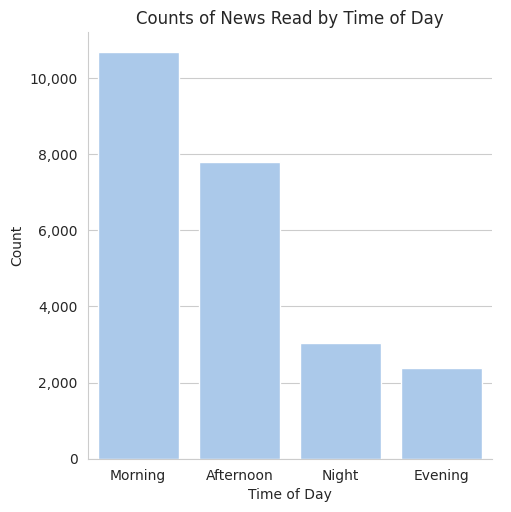

In [25]:
# Visualize using seaborn
sns.set_style('whitegrid')
sns.set_palette('pastel')

time = sampled_test.copy()
time['Time_of_Day'] = time['Time_of_Day'].replace({'morning': 'Morning', 'afternoon': 'Afternoon', 'evening': 'Evening', 'night': 'Night'})
T = sns.catplot(x="Time_of_Day", kind="count", data=time, order=time['Time_of_Day'].value_counts().index, height=5, aspect=1)

for ay in T.axes.flat:
    ay.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

T.set(title='Counts of News Read by Time of Day', xlabel='Time of Day', ylabel='Count')
plt.show()

## Popular Entities

To understand what entities are the most popular among all the news we have in the dataset, we will clean the 'TitleEnt' column to look into the frequency of each entity.

In [26]:
# Create a new column of Labels
def extract_labels(row):
    try:
        if pd.notnull(row) and isinstance(row, str):
            objects = json.loads(row)
            labels = [obj['Label'].replace(" ", "_").replace(",", "_") for obj in objects]
            return labels
        else:
            return []
    except Exception as e:
        return []

test_n_df['Labels'] = test_n_df['TitleEnt'].apply(extract_labels)
test_n_df.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[Prince_Philip__Duke_of_Edinburgh, Charles__Pr..."
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[IPad, Walmart]"
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...",[Adipose_tissue]
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,"[{""Label"": ""Drug Enforcement Administration"", ...",[],[Drug_Enforcement_Administration]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId...",[]


In [27]:
test_n_df1 = test_n_df.explode('Labels')
test_n_df1

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Prince_Philip__Duke_of_Edinburgh
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Charles__Prince_of_Wales
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],Elizabeth_II
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...",IPad
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...",Walmart
...,...,...,...,...,...,...,...,...
120954,N30717,travel,travelarticle,Perfect North Slopes purchases bankrupt West V...,Perfect North Slopes is expanding its reach wi...,"[{""Label"": ""Perfect North Slopes"", ""Type"": ""S""...","[{""Label"": ""Perfect North Slopes"", ""Type"": ""S""...",West_Virginia
120955,N56897,sports,basketball_ncaa,Arizona Wildcats basketball dismisses Devonair...,Arizona basketball coach Sean Miller announced...,"[{""Label"": ""Arizona Wildcats"", ""Type"": ""U"", ""W...","[{""Label"": ""Sean Miller"", ""Type"": ""P"", ""Wikida...",Arizona_Wildcats
120956,N108404,video,news,Concerns continue to grow over Trump's busines...,After Kentucky Governor Matt Bevin spent two n...,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Citizens for Responsibility and Et...",Donald_Trump
120957,N74617,autos,autossports,Best Sports Car Deals for October,NaN,"[{""Label"": ""Peugeot RCZ"", ""Type"": ""V"", ""Wikida...",[],Peugeot_RCZ


In [28]:
count_labels = test_n_df1['Labels'].value_counts()
n = 20
top_labels = count_labels.head(n)
print(top_labels)

Donald_Trump                        2909
National_Football_League            1174
New_England_Patriots                1072
Houston_Astros                       808
United_States                        739
California                           734
Cleveland_Browns                     647
Philadelphia_Eagles                  603
Pittsburgh_Steelers                  594
Republican_Party_(United_States)     584
Dallas_Cowboys                       578
Florida                              571
New_York_Yankees                     566
Democratic_Party_(United_States)     565
Houston_Texans                       547
Ukraine                              534
Baltimore_Ravens                     520
Indianapolis_Colts                   516
Halloween                            514
Detroit_Lions                        495
Name: Labels, dtype: int64


From the above, we can see that Donald Trump is the most frequenly appeared entity, almost 3 folds of the second popular entity, National Football League. Following these two, are New England Patriorts, Houston Astros and United States.

## Popular News Category

To understand what news category is the most popular, let's check how many news each category contains in our dataset.

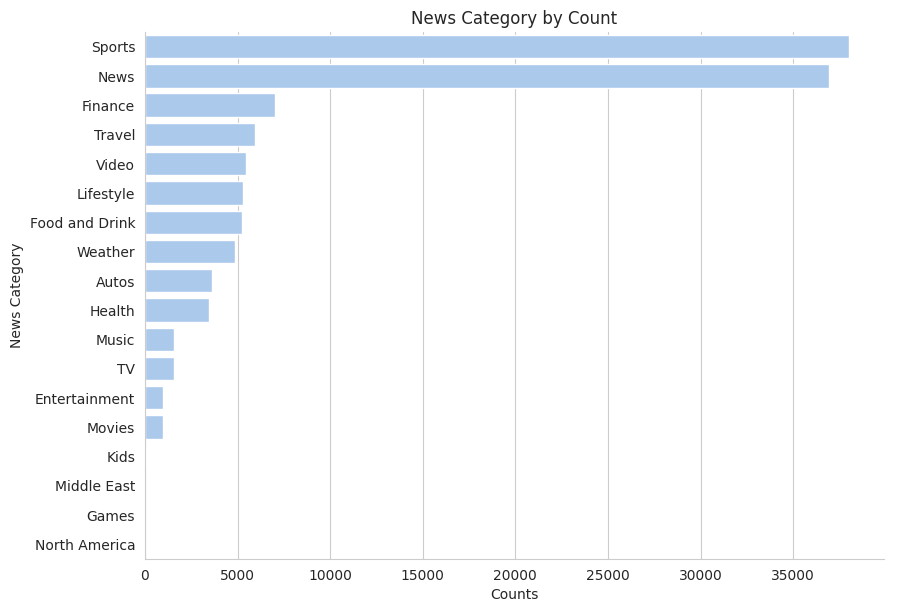

In [29]:
# Get a new dataframe for category and rename the columns
cat = test_n_df.copy()
cat['Category'] = cat['Category'].replace({
    'sports': 'Sports','news': 'News', 'finance': 'Finance', 'travel': 'Travel', 'video': 'Video', 'lifestyle': 'Lifestyle', 'foodanddrink': 'Food and Drink',
    'weather': 'Weather', 'autos': 'Autos', 'health': 'Health', 'music': 'Music', 'tv': 'TV', 'entertainment': 'Entertainment', 'movies': 'Movies',
    'kids': 'Kids', 'middleeast': 'Middle East', 'games': 'Games', 'northamerica': 'North America'})

# Graph the count of each category
cat_plot = sns.catplot(y='Category', kind='count', data=cat, order=cat['Category'].value_counts().index, height=6, aspect=1.5)

cat_plot.set(title='News Category by Count', xlabel='Counts', ylabel='News Category')
plt.show()

It seems like most of the categories our dataset contains is Sports and News, exceeding 35,000. On the other hand, we do not have much Kids, Middle East, Games, and North America categories.

To explore what topics make Sports such a big category, let's take a look into Sports's subcategories.

In [30]:
cat_sports = cat[cat['Category'] == 'Sports']
cat_sports['SubCat'].value_counts().head(5)

football_nfl      14211
football_ncaa      4155
baseball_mlb       4001
basketball_nba     3841
more_sports        3271
Name: SubCat, dtype: int64

In the Sports category, football_nfl is the most popular subcategory, aligning with the most frequent entity we just discovered.

Then, to understand what categories the users like to read, we check the categories in each user's history, and count what category appears the most frequently.

In [31]:
# Merge two datasets to link each News ID to title
cat_hist = pd.merge(exploded_test, test_n_df, left_on = 'History', right_on = 'NewsId', how = 'left')

# Create the new dataframe
cat_hist = cat_hist[['ImpressionId', 'UserId', 'History', 'Category', 'SubCat', 'Title']]
cat_hist.head()

,ImpressionId,UserId,History,Category,SubCat,Title
0,8,U84394,N54656,movies,movienews,'Joker' Continues to Smash Box Office Expectat...
1,8,U84394,N128643,tv,tv-celebrity,"Miguel Cervantes' Wife Reveals Daughter, 3, 'D..."
2,8,U84394,N92838,video,lifestyle,All-female Delta crew flies 120 girls to NASA ...
3,8,U84394,N106692,finance,finance-companies,Yahoo data breach $117.5 million settlement: G...
4,8,U84394,N50914,health,voices,My Father's Battle With Alzheimer's Revealed a...


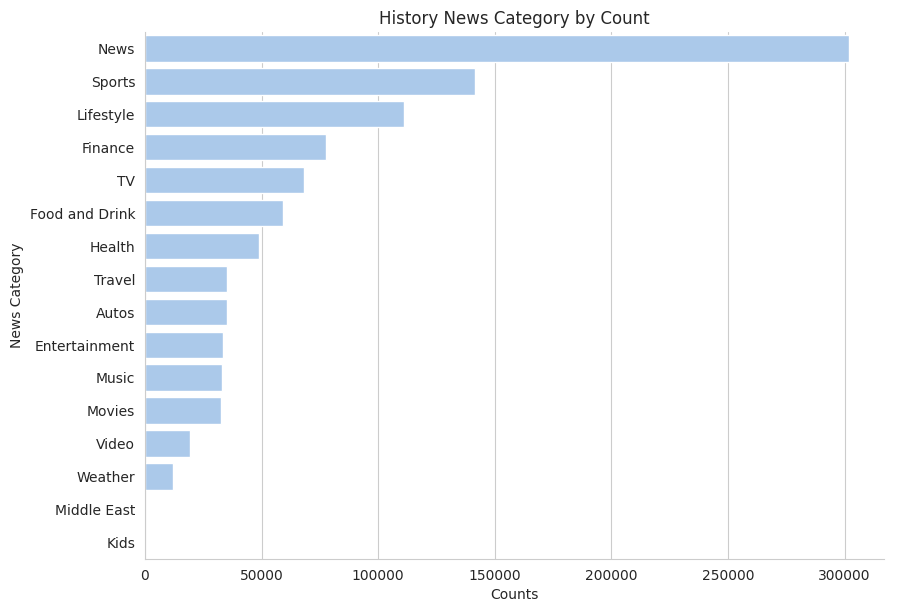

In [32]:
# Rename the columns
cat_hist['Category'] = cat_hist['Category'].replace({
    'sports': 'Sports','news': 'News', 'finance': 'Finance', 'travel': 'Travel', 'video': 'Video', 'lifestyle': 'Lifestyle', 'foodanddrink': 'Food and Drink',
    'weather': 'Weather', 'autos': 'Autos', 'health': 'Health', 'music': 'Music', 'tv': 'TV', 'entertainment': 'Entertainment', 'movies': 'Movies',
    'kids': 'Kids', 'middleeast': 'Middle East', 'games': 'Games', 'northamerica': 'North America'})

# Plot the count of news in history
hist_plot = sns.catplot(y='Category', kind='count', data=cat_hist, order=cat_hist['Category'].value_counts().index, height=6, aspect=1.5)

hist_plot.set(title='History News Category by Count', xlabel='Counts', ylabel='News Category')
plt.show()

It seems like among the users we have in the sample, News is the most popular category that they would like to read. Following are Sorts, Lifestyle, Finance, and TV. Middle East, Kids, and Games have almost no count because we do not have much of them in the dataset. North America even disappear from the graph.

# TF-IDF

To perform clustering, we may first transform our text into vectors by combining the news dataset and behavior dataset and applying the TF-IDF measure.

In [33]:
# Merging news and behavior datasets

test_n_df['NewsId'] = test_n_df['NewsId'].astype(str)
exploded_test['History'] = exploded_test['History'].astype(str)

merged_df = pd.merge(test_n_df, exploded_test, left_on='NewsId', right_on='History')

print(merged_df.shape)
print(merged_df.head())

(1009664, 12)
   NewsId Category     SubCat  \
0  N93187     news  newsworld   
1  N93187     news  newsworld   
2  N93187     news  newsworld   
3  N93187     news  newsworld   
4  N93187     news  newsworld   

                                               Title  \
0  The Cost of Trump's Aid Freeze in the Trenches...   
1  The Cost of Trump's Aid Freeze in the Trenches...   
2  The Cost of Trump's Aid Freeze in the Trenches...   
3  The Cost of Trump's Aid Freeze in the Trenches...   
4  The Cost of Trump's Aid Freeze in the Trenches...   

                                            Abstract TitleEnt  \
0  Lt. Ivan Molchanets peeked over a parapet of s...       []   
1  Lt. Ivan Molchanets peeked over a parapet of s...       []   
2  Lt. Ivan Molchanets peeked over a parapet of s...       []   
3  Lt. Ivan Molchanets peeked over a parapet of s...       []   
4  Lt. Ivan Molchanets peeked over a parapet of s...       []   

                                         AbstractEnt Labels

To transform what we have into vectors, we may take a smaller sample.

In [34]:
sampled_df = merged_df.sample(frac=0.01, random_state = 42)
print(sampled_df.shape)
print(sampled_df.head())

(10097, 12)
         NewsId      Category             SubCat  \
479255  N116725         music    music-celebrity   
871546   N25751       weather  weathertopstories   
232147   N68153          news       newspolitics   
23759    N24115     lifestyle      shop-holidays   
376817   N96437  foodanddrink           foodnews   

                                                    Title  \
479255  Justin Bieber Reveals Where He Stands With Tay...   
871546  This Arctic blast is in its final day. But the...   
232147  Are Democrats Willing to Pay More in Taxes for...   
23759   100+ Funny White Elephant Gifts That'll Leave ...   
376817  Rachael Ray finally opens restaurant with no p...   

                                                 Abstract  \
479255  The two performers have not seen eye to eye in...   
871546  The hundreds of millions of people gripped by ...   
232147  Senator Elizabeth Warren has surged to the fro...   
23759                                 The pressure is on!   
376

In [35]:
sampled_df.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,ImpressionId,UserId,Time,History
479255,N116725,music,music-celebrity,Justin Bieber Reveals Where He Stands With Tay...,The two performers have not seen eye to eye in...,"[{""Label"": ""Justin Bieber"", ""Type"": ""P"", ""Wiki...",[],"[Justin_Bieber, Scooter_Braun, Taylor_Swift]",915141,U71331,11/16/2019 6:12:47 PM,N116725
871546,N25751,weather,weathertopstories,This Arctic blast is in its final day. But the...,The hundreds of millions of people gripped by ...,[],[],[],2100952,U238095,11/21/2019 4:26:34 AM,N25751
232147,N68153,news,newspolitics,Are Democrats Willing to Pay More in Taxes for...,Senator Elizabeth Warren has surged to the fro...,"[{""Label"": ""Single-payer healthcare"", ""Type"": ...","[{""Label"": ""Single-payer healthcare"", ""Type"": ...","[Single-payer_healthcare, Democratic_Party_(Un...",406202,U158749,11/21/2019 8:38:36 AM,N68153
23759,N24115,lifestyle,shop-holidays,100+ Funny White Elephant Gifts That'll Leave ...,The pressure is on!,"[{""Label"": ""Christmas and holiday season"", ""Ty...",[],"[Christmas_and_holiday_season, White_elephant_...",1258045,U483927,11/21/2019 2:41:25 PM,N24115
376817,N96437,foodanddrink,foodnews,Rachael Ray finally opens restaurant with no p...,Rachael Ray is the anomaly among TV celebrity ...,[],[],[],563166,U111650,11/22/2019 7:33:09 PM,N96437


In [36]:
# Removal of Entity(for titles)
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.corpus import stopwords
from nltk.tree import Tree
import string

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

def remove_entities(tokens):
    tags = pos_tag(tokens)
    tree = ne_chunk(tags)
    return [leaf[0] for leaf in tree if type(leaf) != Tree]

tokenized_news = [word_tokenize(t) for t in sampled_df['Title'].str.lower()]

tokenized_news = [[word for word in tokens if word not in string.punctuation] for tokens in tokenized_news]

stop_words = set(stopwords.words('english'))
tokenized_news = [[word for word in tokens if word not in stop_words] for tokens in tokenized_news]

tokenized_news = [remove_entities(tokens) for tokens in tokenized_news]

# Transform the list of words back to a Dataframe
processed_news = [' '.join(tokens) for tokens in tokenized_news]
#processed_news_column = pd.DataFrame(processed_news, columns=['Processed_Text'])
# or
sampled_df['Processed_Title'] = processed_news

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## TF-IDF min max document threshold

In [37]:
# Perform the TF-IDF measure
from sklearn.feature_extraction.text import TfidfVectorizer

# Min & Max document threshold， n-grams should be performed here
tfidf = TfidfVectorizer(stop_words='english', min_df=0.001, max_df=0.999, ngram_range=(1, 3))
text_vectors = tfidf.fit_transform(sampled_df['Title'])

In [38]:
print(tfidf.vocabulary_)

{'justin': 1511, 'bieber': 345, 'reveals': 2316, 'stands': 2597, 'taylor': 2724, 'swift': 2704, 'taylor swift': 2727, 'arctic': 225, 'blast': 361, 'final': 1072, 'day': 753, 'cold': 633, 'isn': 1433, 'quite': 2208, 'arctic blast': 226, 'democrats': 820, 'pay': 2052, 'taxes': 2723, '100': 3, 'funny': 1157, 'white': 2969, 'gifts': 1187, 'll': 1658, 'leave': 1614, 'hard': 1275, 'holiday': 1334, 'season': 2426, 'holiday season': 1335, 'finally': 1073, 'opens': 1996, 'restaurant': 2305, 'physical': 2074, 'kelly': 1535, 'ripa': 2336, 'responds': 2293, 'backlash': 291, 'son': 2545, 'extreme': 1001, 'poverty': 2154, 'joke': 1495, 'kelly ripa': 1536, 'extreme poverty': 1002, 'kentucky': 1540, 'man': 1703, 'dies': 860, 'trying': 2856, 'save': 2393, 'florida': 1105, 'rip': 2333, 'family': 1024, 'trip': 2840, 'man dies': 1707, 'husband': 1375, 'years': 3059, 'old': 1991, 'marriage': 1722, 'like': 1632, 'years old': 3063, 'haunted': 1286, 'place': 2088, 'state': 2619, 'don': 907, 'visit': 2912, 'co

In [39]:
print(text_vectors)

  (0, 2727)	0.4106089225553428
  (0, 2704)	0.4106089225553428
  (0, 2724)	0.354504940656519
  (0, 2597)	0.3848854347116029
  (0, 2316)	0.3068262921578354
  (0, 345)	0.4029332356510453
  (0, 1511)	0.3639952042009802
  (1, 226)	0.3769374787199399
  (1, 2208)	0.39149781409127415
  (1, 1433)	0.3213338631392089
  (1, 633)	0.3451219650853572
  (1, 753)	0.2579282820870972
  (1, 1072)	0.3802039405613898
  (1, 361)	0.3682396917734782
  (1, 225)	0.3682396917734782
  (2, 2723)	0.6304184353726084
  (2, 2052)	0.5465369172997825
  (2, 820)	0.5512440424810079
  (3, 1335)	0.3538089991969064
  (3, 2426)	0.2653441941994586
  (3, 1334)	0.31027872255948713
  (3, 1275)	0.312715516053805
  (3, 1614)	0.3568750344422288
  (3, 1658)	0.2926268312576871
  (3, 1187)	0.3601526827664611
  :	:
  (10093, 134)	0.23221333290200843
  (10093, 1603)	0.23221333290200843
  (10093, 133)	0.21747364202122382
  (10093, 1226)	0.23221333290200843
  (10093, 1602)	0.23221333290200843
  (10093, 425)	0.2312077216211301
  (10093, 10)	

In [40]:
text_vectors.shape

(10097, 3075)

# Stemming and Lemmatization

To find meaning in news titles, we implemented stemming and lemmatization to reduce words into their root form for more effective vectorization. We stored the tokenized titles in the stemm_lemm_titles object for downstream tasks.

In [41]:
!pip install nltk
import nltk
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_text(text):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_and_lemmatized_tokens = [lemmatizer.lemmatize(stemmer.stem(token)) for token in tokens]
    return stemmed_and_lemmatized_tokens

stemm_lemm_titles = []
for title in sampled_df['Processed_Title']:
    stemmed_and_lemmatized_tokens = process_text(title)
    stemm_lemm_titles.append(' '.join(stemmed_and_lemmatized_tokens))

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Word Embedding with Word2vec

To conduct visualization with t-SNE, we first vectorized the stemmed and lemmatized titles using word embeddings. We chose this technique to preserve more meaning in addition to semantic relationships.

In [42]:
import gensim
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

w2v = Word2Vec(stemm_lemm_titles, sg=1, negative=5, vector_size=100, window=8, min_count=5, workers=4)

word_vectors = w2v.wv

# Create a DataFrame to store word vectors
word_vectors_df = pd.DataFrame(word_vectors.vectors, index=word_vectors.index_to_key)

# Rename columns
word_vectors_df.columns = [f"vector_{i+1}" for i in range(w2v.vector_size)]
word_vectors_df

,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6,vector_7,vector_8,vector_9,vector_10,...,vector_91,vector_92,vector_93,vector_94,vector_95,vector_96,vector_97,vector_98,vector_99,vector_100
,-0.060945,0.044972,0.061911,0.032619,-0.074974,-0.038722,-0.001526,0.221967,-0.122324,-0.122676,...,-0.071525,0.024303,-0.035718,0.031074,0.115946,0.108072,0.100437,-0.043737,0.052090,0.032332
e,-0.045076,0.084765,0.069983,0.039950,0.059549,0.002465,-0.005648,0.157054,-0.176556,-0.068530,...,-0.001648,0.111955,0.027387,0.071263,0.140945,0.155162,0.004263,0.006228,0.039257,0.015553
a,-0.097713,0.042882,0.070046,0.058454,0.054324,-0.044104,0.071951,0.199789,-0.185986,-0.084924,...,0.012397,0.073964,-0.027690,0.084374,0.122316,0.093185,0.135144,0.037664,0.064584,0.064372
r,-0.139776,0.040070,0.000662,-0.033981,0.080679,-0.043734,-0.004851,0.119981,-0.182757,-0.055996,...,0.063669,0.066869,0.002746,0.059437,0.146670,0.097278,0.043162,0.038072,-0.015425,0.100370
i,-0.121140,-0.029845,0.015726,0.007623,0.061684,0.002391,0.009577,0.168990,-0.243940,-0.063240,...,0.032700,0.070437,-0.001953,0.074695,0.095285,0.125985,0.141476,0.057558,0.105465,0.106918
t,-0.041040,0.032885,0.049673,0.064944,0.072589,0.005280,-0.024452,0.068344,-0.082275,-0.022815,...,0.020986,0.078043,0.004580,0.002366,0.107505,0.119256,0.093476,0.026926,0.072912,0.064797
o,-0.052049,0.047747,0.061591,0.062191,0.033078,-0.019384,0.029741,0.214297,-0.173975,-0.060765,...,0.044419,0.080940,0.014254,0.055658,0.175441,0.079799,0.105542,0.116501,0.017923,0.111471
n,-0.067434,0.076353,0.047063,0.017424,0.043369,-0.033428,-0.038381,0.139484,-0.156096,-0.111609,...,0.016500,0.051449,-0.011944,0.003913,0.161435,0.108758,0.071948,0.040771,-0.020241,0.059536
s,-0.112077,0.103411,0.021041,0.040580,0.042705,-0.012542,-0.002164,0.075081,-0.154308,-0.023155,...,0.086607,0.060311,0.019842,0.073189,0.188688,0.065540,0.057738,0.013723,0.005300,0.057476
l,-0.040904,0.016195,0.028751,0.009608,0.006120,-0.009773,-0.019619,0.062231,-0.159468,-0.078478,...,0.110447,0.079779,-0.049014,0.031926,0.178582,0.069931,0.087629,0.037968,0.001678,0.085115


# Clustering


Then, to have a overview of our data, we may perform the K-Means clustering based on the vectors we just generated to see how our data is distributed.

In [43]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import plotly.express as px

## Text-Vectors

In [44]:
# Use PCA to reduce dimension to 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

pca_vecs = pca.fit_transform(text_vectors.toarray())

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

For n_clusters = 2 The average silhouette_score is : 0.7786317837806005
For n_clusters = 3 The average silhouette_score is : 0.7518268499088487
For n_clusters = 4 The average silhouette_score is : 0.7466143943575261
For n_clusters = 5 The average silhouette_score is : 0.5431480336403208
For n_clusters = 6 The average silhouette_score is : 0.5678251366477215
For n_clusters = 7 The average silhouette_score is : 0.5630060094592703
For n_clusters = 8 The average silhouette_score is : 0.5622155770762263
For n_clusters = 9 The average silhouette_score is : 0.4572519445197165


Text(0.5, 1.0, 'Evaluating optimal k')

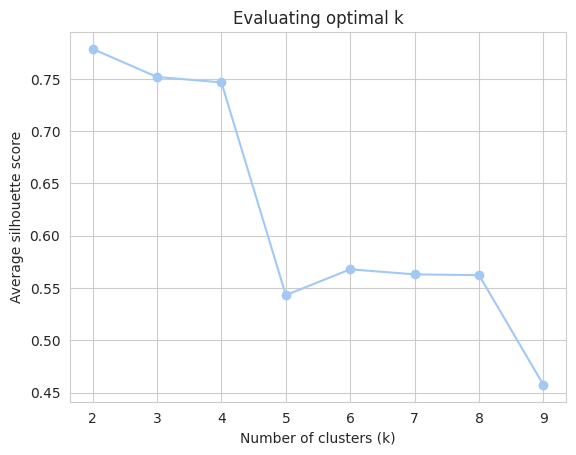

In [45]:
from sklearn.metrics import silhouette_score, silhouette_samples

opt_ks = range(2, 10)
sil_scores = []

# iterating through ks and list out avg silhouette_score
for k in opt_ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_vecs)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_vecs, labels)
    sil_scores.append(silhouette_avg)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

plt.plot(opt_ks, sil_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.title('Evaluating optimal k')

To conduct sensitivity analysis with hyperparameter tuning, we used the average silhouette score to find the optimal k for k-means clustering. We chose k = 5, since the silhouette score sees a significant drop at k = 6. In addition, for the context of our news corpus, we aim for defining more number of clusters to inspect the different characteristics of these segments.

In [46]:
# Performs K-Means clustering with K = 4
k = 4
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(text_vectors)
cluster_labels = kmeans.labels_

In [47]:
text_vectors_df = pd.DataFrame(text_vectors)

text_vectors_df['cluster'] = cluster_labels
text_vectors_df['x0'] = pca_vecs[:, 0]
text_vectors_df['x1'] = pca_vecs[:, 1]

In [48]:
feature_names = tfidf.get_feature_names_out()

In [49]:
df = pd.DataFrame(text_vectors.todense(), columns=feature_names)
df['cluster'] = cluster_labels
df_grouped = df.groupby('cluster').mean()

def get_top_keywords(n_terms, text_vectors, feature_names, cluster_labels):
    for i, row in df_grouped.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([feature_names[t] for t in np.argsort(row)[-n_terms:]]))  # Make sure to use np.argsort(row)

get_top_keywords(10, text_vectors, feature_names, cluster_labels)


Cluster 0
mcconnell snubbed, mcconnell, widow, cummings widow, mitch, mitch mcconnell, capitol, elijah, elijah cummings, cummings

Cluster 1
middleton, kate middleton, kate, prince harry, harry, meghan markle, markle, prince, meghan, just

Cluster 2
dies, year, years, woman, 2019, says, world, man, best, new

Cluster 3
says, jr, trump jr, donald trump, campaign, donald, president, ukraine, impeachment, trump


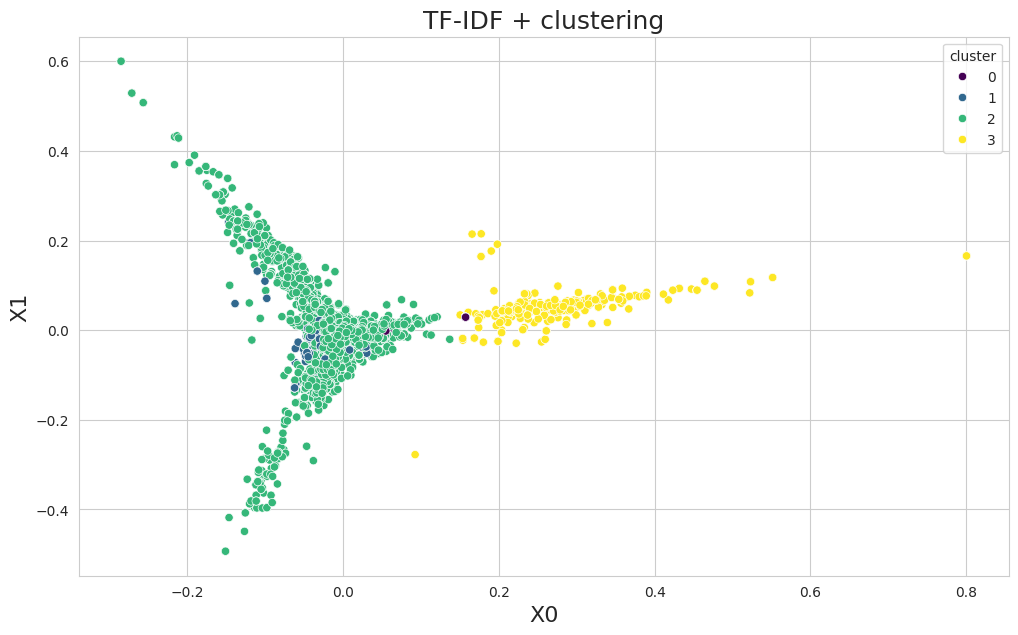

In [50]:
# Plot out the clustering result
import matplotlib.pyplot as plt
import seaborn as sns

text_vectors_df = text_vectors_df.reset_index()

plt.figure(figsize=(12, 7))
plt.title("TF-IDF + clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=text_vectors_df, x='x0', y='x1', hue='cluster', palette='viridis')

plt.show()

## Word Cloud

To visualize the frequent words from the clusters, we also generated word clouds.

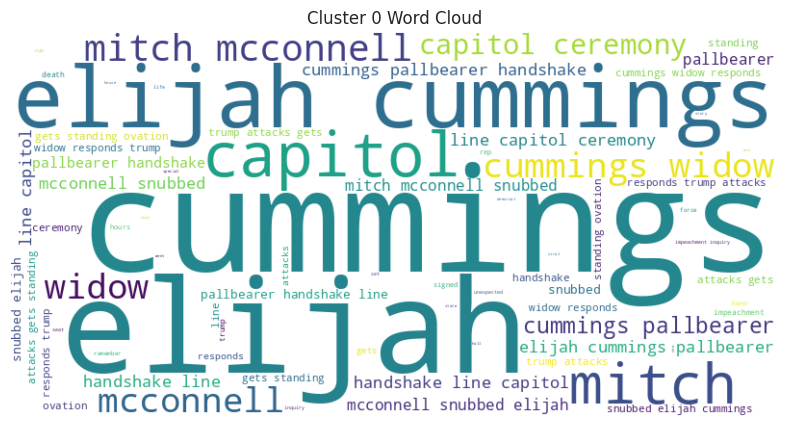

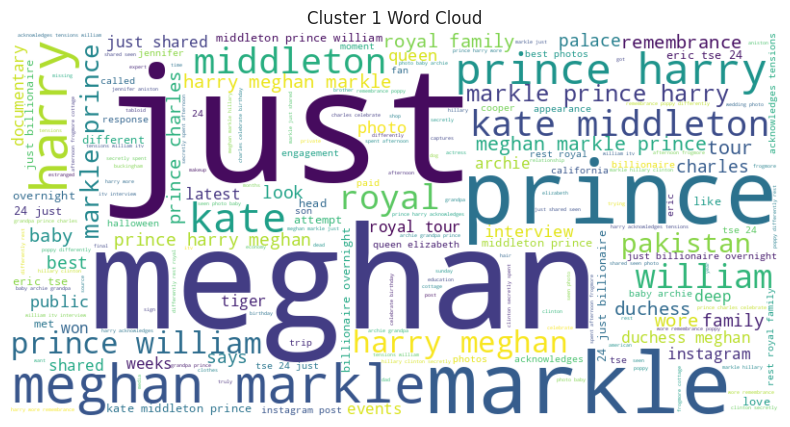

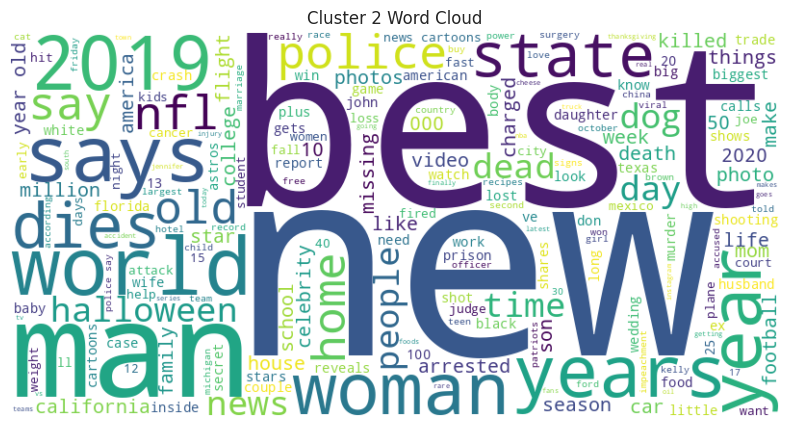

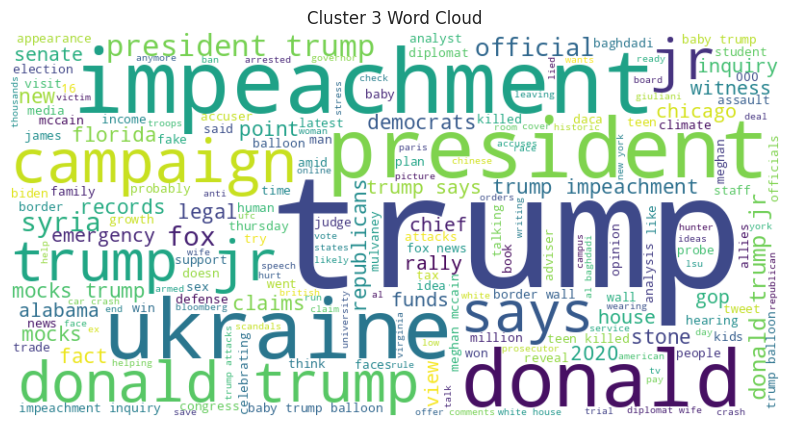

In [51]:
!pip install wordcloud
from wordcloud import WordCloud

word_freqs = {}
for i, feature_name in enumerate(feature_names):
    word_freqs[feature_name] = df.iloc[:, i].sum()

for cluster_id in range(4):
    # filter df based on kmeans clusters
    cluster_df = df[df['cluster'] == cluster_id]
    # dictionary of feature names and TF-IDF scores
    cluster_word_freqs = {}
    for i, feature_name in enumerate(feature_names):
        cluster_word_freqs[feature_name] = cluster_df.iloc[:, i].sum()
    # weights = word frequencies
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wc.generate_from_frequencies(cluster_word_freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Cluster {cluster_id} Word Cloud')
    plt.axis('off')
    plt.show()

# TSNE

In [52]:
# Use PCA to reduce dimension to 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

pca_vecs = pca.fit_transform(word_vectors_df)

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

For n_clusters = 2 The average silhouette_score is : 0.6881628
For n_clusters = 3 The average silhouette_score is : 0.7176195
For n_clusters = 4 The average silhouette_score is : 0.67425555
For n_clusters = 5 The average silhouette_score is : 0.66807085
For n_clusters = 6 The average silhouette_score is : 0.63607794
For n_clusters = 7 The average silhouette_score is : 0.6411069
For n_clusters = 8 The average silhouette_score is : 0.4321741
For n_clusters = 9 The average silhouette_score is : 0.40680552


Text(0.5, 1.0, 'Evaluating optimal k')

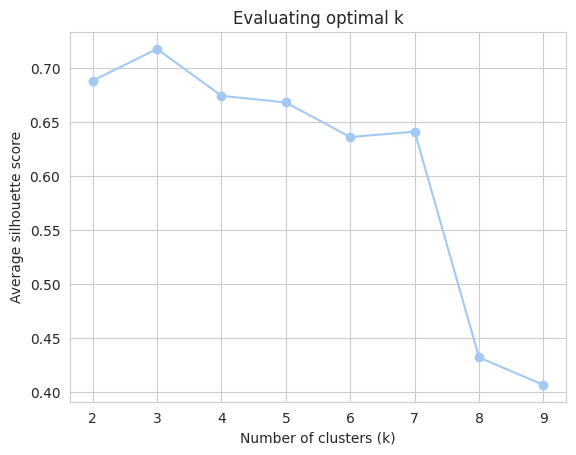

In [53]:
from sklearn.metrics import silhouette_score, silhouette_samples

opt_ks = range(2, 10)
sil_scores = []

# iterating through ks and list out avg silhouette_score
for k in opt_ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_vecs)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_vecs, labels)
    sil_scores.append(silhouette_avg)
    print("For n_clusters =", k, "The average silhouette_score is :", silhouette_avg)

plt.plot(opt_ks, sil_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.title('Evaluating optimal k')

In [54]:
# Performs K-Means clustering with K = 3
k = 3
kmeans = KMeans(n_clusters = k, random_state = 42)
kmeans.fit(word_vectors_df)
cluster_labels = kmeans.labels_

In [55]:
word_vectors_df['cluster'] = cluster_labels
word_vectors_df['x0'] = pca_vecs[:, 0]
word_vectors_df['x1'] = pca_vecs[:, 1]

In [56]:
feature_names = tfidf.get_feature_names_out()

In [57]:
#df = pd.DataFrame(text_vectors.todense(), columns=feature_names)
df = word_vectors_df
df['cluster'] = cluster_labels
df_grouped = df.groupby('cluster').mean()

def get_top_keywords(n_terms, word_vectors_df, feature_names, cluster_labels):
    for i, row in df_grouped.iterrows():
        print('\nCluster {}'.format(i))
        print(', '.join([feature_names[t] for t in np.argsort(row)[-n_terms:]]))  # Make sure to use np.argsort(row)

get_top_keywords(10, word_vectors_df, feature_names, cluster_labels)


Cluster 0
101 years, 101 years dislodged, 15, 2020, 35, 2017, 40, 62, accuser, act

Cluster 1
101 years dislodged, accuser, 60, 49ers, 24, 17 photos ugly, 130 aircraft, 25, 40, 50

Cluster 2
46, 14, 26, 17 photos ugly, 18 dead, 2019 halloween, 18 dead gorge, 60, 25, actions


In [58]:
word_vectors_df = word_vectors_df.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Check if there are any NaN values after conversion
if word_vectors_df.isnull().any().any():
    # Handle NaN values. Here, we replace NaN with 0
    word_vectors_df = word_vectors_df.fillna(0)


In [59]:
from sklearn.manifold import TSNE
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(word_vectors_df)

x = []
y = []
for value in new_values:
  x.append(value[0])
  y.append(value[1])

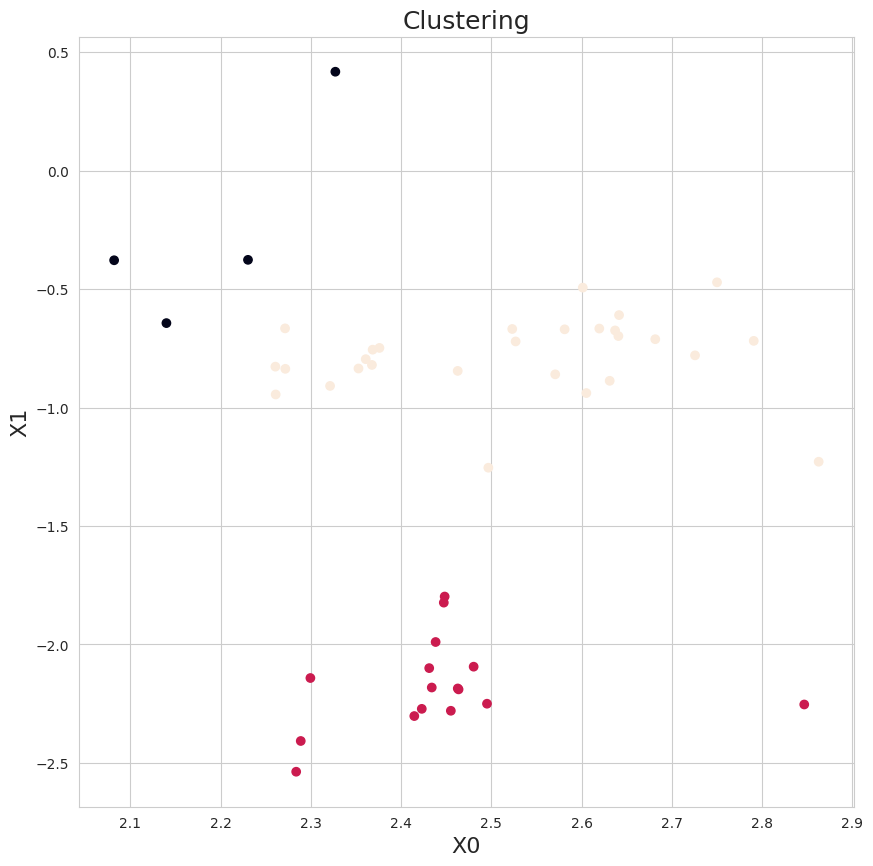

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(new_values)
labels = kmeans.labels_

plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=labels)
plt.title("Clustering", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
plt.show()

# DBSCAN


In [61]:
text_vectors_df = pd.DataFrame(text_vectors)

In [62]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import DBSCAN
from scipy.sparse import coo_matrix

dbscan = DBSCAN(eps=1, min_samples=2)
dbscan.fit(word_vectors_df)

DBSCAN(eps=1, min_samples=2)

In [63]:
cluster_labels = dbscan.labels_
coords = word_vectors_df
no_clusters = len(np.unique(cluster_labels) )
no_noise = np.sum(np.array(cluster_labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 8


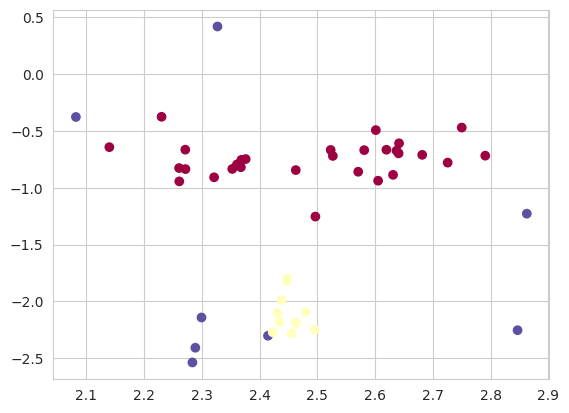

In [64]:
unique_labels = set(cluster_labels)

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

cluster_colors = {label: color for label, color in zip(unique_labels, colors)}

point_colors = [cluster_colors[label] for label in cluster_labels]

plt.scatter(x, y, c=point_colors, marker='o')
plt.show()

# Sentiment Analysis

To understand the sentiment of the news that viewed by the users, we may be able to discover what kind of news may be more widespreaded or what kind of news the publishers would like to write. We may use two approaches to understand the sentiment.

First, tokenize the titles and filter out the stop words.

In [65]:
nltk.download('stopwords')
nltk.download('punkt')

# Create a new dataframe and clean it for tokenization
sent = sampled_df.copy()
sent["text_prcessed"] = sent["Title"].str.lower()
sent["text_prcessed"] = sent["text_prcessed"].replace('<br />', ' ', regex=True)
sent["text_prcessed"] = sent["text_prcessed"].replace('[^\w\d\s]', ' ', regex=True)
sent.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,ImpressionId,UserId,Time,History,Processed_Title,text_prcessed
479255,N116725,music,music-celebrity,Justin Bieber Reveals Where He Stands With Tay...,The two performers have not seen eye to eye in...,"[{""Label"": ""Justin Bieber"", ""Type"": ""P"", ""Wiki...",[],"[Justin_Bieber, Scooter_Braun, Taylor_Swift]",915141,U71331,11/16/2019 6:12:47 PM,N116725,justin bieber reveals stands taylor swift scoo...,justin bieber reveals where he stands with tay...
871546,N25751,weather,weathertopstories,This Arctic blast is in its final day. But the...,The hundreds of millions of people gripped by ...,[],[],[],2100952,U238095,11/21/2019 4:26:34 AM,N25751,arctic blast final day cold n't quite yet,this arctic blast is in its final day but the...
232147,N68153,news,newspolitics,Are Democrats Willing to Pay More in Taxes for...,Senator Elizabeth Warren has surged to the fro...,"[{""Label"": ""Single-payer healthcare"", ""Type"": ...","[{""Label"": ""Single-payer healthcare"", ""Type"": ...","[Single-payer_healthcare, Democratic_Party_(Un...",406202,U158749,11/21/2019 8:38:36 AM,N68153,democrats willing pay taxes medicare,are democrats willing to pay more in taxes for...
23759,N24115,lifestyle,shop-holidays,100+ Funny White Elephant Gifts That'll Leave ...,The pressure is on!,"[{""Label"": ""Christmas and holiday season"", ""Ty...",[],"[Christmas_and_holiday_season, White_elephant_...",1258045,U483927,11/21/2019 2:41:25 PM,N24115,100+ funny white elephant gifts 'll leave ever...,100 funny white elephant gifts that ll leave ...
376817,N96437,foodanddrink,foodnews,Rachael Ray finally opens restaurant with no p...,Rachael Ray is the anomaly among TV celebrity ...,[],[],[],563166,U111650,11/22/2019 7:33:09 PM,N96437,rachael ray finally opens restaurant physical ...,rachael ray finally opens restaurant with no p...


In [66]:
# Tokenize the column
sent["text_prcessed"] = sent["text_prcessed"].astype(str)
tokenized_titles = [word_tokenize(word) for word in sent["text_prcessed"]]

In [67]:
# Define the stop words and filter out them
stop_words = set(stopwords.words('english'))

for indx, tokens in enumerate(tokenized_titles):
  tokenized_titles[indx] = [word for word in tokens if word not in stop_words]


sent["tokenized"] = tokenized_titles
sent.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,ImpressionId,UserId,Time,History,Processed_Title,text_prcessed,tokenized
479255,N116725,music,music-celebrity,Justin Bieber Reveals Where He Stands With Tay...,The two performers have not seen eye to eye in...,"[{""Label"": ""Justin Bieber"", ""Type"": ""P"", ""Wiki...",[],"[Justin_Bieber, Scooter_Braun, Taylor_Swift]",915141,U71331,11/16/2019 6:12:47 PM,N116725,justin bieber reveals stands taylor swift scoo...,justin bieber reveals where he stands with tay...,"[justin, bieber, reveals, stands, taylor, swif..."
871546,N25751,weather,weathertopstories,This Arctic blast is in its final day. But the...,The hundreds of millions of people gripped by ...,[],[],[],2100952,U238095,11/21/2019 4:26:34 AM,N25751,arctic blast final day cold n't quite yet,this arctic blast is in its final day but the...,"[arctic, blast, final, day, cold, quite, yet]"
232147,N68153,news,newspolitics,Are Democrats Willing to Pay More in Taxes for...,Senator Elizabeth Warren has surged to the fro...,"[{""Label"": ""Single-payer healthcare"", ""Type"": ...","[{""Label"": ""Single-payer healthcare"", ""Type"": ...","[Single-payer_healthcare, Democratic_Party_(Un...",406202,U158749,11/21/2019 8:38:36 AM,N68153,democrats willing pay taxes medicare,are democrats willing to pay more in taxes for...,"[democrats, willing, pay, taxes, medicare]"
23759,N24115,lifestyle,shop-holidays,100+ Funny White Elephant Gifts That'll Leave ...,The pressure is on!,"[{""Label"": ""Christmas and holiday season"", ""Ty...",[],"[Christmas_and_holiday_season, White_elephant_...",1258045,U483927,11/21/2019 2:41:25 PM,N24115,100+ funny white elephant gifts 'll leave ever...,100 funny white elephant gifts that ll leave ...,"[100, funny, white, elephant, gifts, leave, ev..."
376817,N96437,foodanddrink,foodnews,Rachael Ray finally opens restaurant with no p...,Rachael Ray is the anomaly among TV celebrity ...,[],[],[],563166,U111650,11/22/2019 7:33:09 PM,N96437,rachael ray finally opens restaurant physical ...,rachael ray finally opens restaurant with no p...,"[rachael, ray, finally, opens, restaurant, phy..."


Now, let's repeat the steps for the news dataframe.

In [68]:
# Take a sample from the original dataset
unique_news = test_n_df['NewsId'].unique()
sampled_news = pd.Series(unique_news).sample(frac=0.1, random_state=42)
sampled_news = test_n_df[test_n_df['NewsId'].isin(sampled_news)]

sampled_news.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[Prince_Philip__Duke_of_Edinburgh, Charles__Pr..."
35,N40432,video,animals,Dog dies protecting Florida children from a de...,The Richardson family shares home video and ph...,"[{""Label"": ""Florida"", ""Type"": ""G"", ""WikidataId...",[],[Florida]
39,N110313,finance,finance-insurance,Nearly half of homeowners don't know what thei...,Know what your insurance covers?,[],[],[]
44,N9580,finance,finance-insurance,The States Where Dogs Put the Biggest Bite on ...,NaN,[],[],[]
62,N55720,finance,finance-insurance,10 dental scams that can bite you hard,1,[],[],[]


In [69]:
sampled_news["text_prcessed"] = sampled_news["Title"].str.lower()
sampled_news["text_prcessed"] = sampled_news["text_prcessed"].replace('<br />', ' ', regex=True)
sampled_news["text_prcessed"] = sampled_news["text_prcessed"].replace('[^\w\d\s]', ' ', regex=True)
sampled_news.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,text_prcessed
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[Prince_Philip__Duke_of_Edinburgh, Charles__Pr...",the brands queen elizabeth prince charles an...
35,N40432,video,animals,Dog dies protecting Florida children from a de...,The Richardson family shares home video and ph...,"[{""Label"": ""Florida"", ""Type"": ""G"", ""WikidataId...",[],[Florida],dog dies protecting florida children from a de...
39,N110313,finance,finance-insurance,Nearly half of homeowners don't know what thei...,Know what your insurance covers?,[],[],[],nearly half of homeowners don t know what thei...
44,N9580,finance,finance-insurance,The States Where Dogs Put the Biggest Bite on ...,NaN,[],[],[],the states where dogs put the biggest bite on ...
62,N55720,finance,finance-insurance,10 dental scams that can bite you hard,1,[],[],[],10 dental scams that can bite you hard


In [70]:
# Tokenize the column
sampled_news["text_prcessed"] = sampled_news["text_prcessed"].astype(str)
tokenized_news = [word_tokenize(word) for word in sampled_news["text_prcessed"]]

# Define the stop words and filter out them
stop_words = set(stopwords.words('english'))

for indx, tokens in enumerate(tokenized_news):
  tokenized_news[indx] = [word for word in tokens if word not in stop_words]


sampled_news["tokenized"] = tokenized_news
sampled_news.head()

,NewsId,Category,SubCat,Title,Abstract,TitleEnt,AbstractEnt,Labels,text_prcessed,tokenized
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[],"[Prince_Philip__Duke_of_Edinburgh, Charles__Pr...",the brands queen elizabeth prince charles an...,"[brands, queen, elizabeth, prince, charles, pr..."
35,N40432,video,animals,Dog dies protecting Florida children from a de...,The Richardson family shares home video and ph...,"[{""Label"": ""Florida"", ""Type"": ""G"", ""WikidataId...",[],[Florida],dog dies protecting florida children from a de...,"[dog, dies, protecting, florida, children, dea..."
39,N110313,finance,finance-insurance,Nearly half of homeowners don't know what thei...,Know what your insurance covers?,[],[],[],nearly half of homeowners don t know what thei...,"[nearly, half, homeowners, know, insurance, co..."
44,N9580,finance,finance-insurance,The States Where Dogs Put the Biggest Bite on ...,NaN,[],[],[],the states where dogs put the biggest bite on ...,"[states, dogs, put, biggest, bite, insurance]"
62,N55720,finance,finance-insurance,10 dental scams that can bite you hard,1,[],[],[],10 dental scams that can bite you hard,"[10, dental, scams, bite, hard]"


The new dataframes are ready for analysis now.

## Topic Modeling

Now, let's apply the LDA model to find the 10 latent topics present in the dataset, and find the probabilities of 5 words in each topic.

In [71]:
from gensim import corpora, models

# Create the corpus
dictionary = corpora.Dictionary(sent['tokenized'])
corpus = [dictionary.doc2bow(tokens) for tokens in sent['tokenized']]

# Set the number of topics we want to check
num_topics = 10
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
  print(topic)

(0, '0.014*"state" + 0.011*"family" + 0.010*"best" + 0.009*"football" + 0.009*"halloween"')
(1, '0.024*"need" + 0.012*"fall" + 0.012*"secret" + 0.011*"buy" + 0.010*"thanksgiving"')
(2, '0.017*"2020" + 0.012*"meghan" + 0.011*"harry" + 0.011*"prince" + 0.010*"changes"')
(3, '0.014*"2019" + 0.012*"college" + 0.011*"halloween" + 0.011*"may" + 0.010*"california"')
(4, '0.011*"life" + 0.011*"new" + 0.010*"cyrus" + 0.010*"miley" + 0.009*"loss"')
(5, '0.011*"death" + 0.011*"dies" + 0.011*"first" + 0.010*"new" + 0.009*"time"')
(6, '0.013*"look" + 0.011*"nfl" + 0.010*"winners" + 0.010*"losers" + 0.009*"falling"')
(7, '0.014*"new" + 0.012*"year" + 0.012*"old" + 0.011*"finally" + 0.010*"arrested"')
(8, '0.023*"trump" + 0.015*"home" + 0.012*"50" + 0.010*"million" + 0.010*"dead"')
(9, '0.014*"2" + 0.011*"says" + 0.011*"killed" + 0.010*"man" + 0.009*"deal"')


From the topics that the model chooses, we can see that most of the words appeared seemed to be negative or neutral.

## Sentiment Analysis

Now, let's apply the Sentiment Intensity Analyzer to understand the sentiment of each topic in the dataset.

### News Title Sentiment

In [72]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Apply sentiment analysis using a lexicon
sia = SentimentIntensityAnalyzer()
sampled_news['sentiment_score'] = sampled_news['tokenized'].apply(lambda tokens: sia.polarity_scores(' '.join(tokens))['compound'])

# Classify sentiment based on the sentiment score
sampled_news['sentiment'] = sampled_news['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Create the result dataframe
news_result = sampled_news[['Title', 'sentiment_score', 'sentiment']]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Text(0.5, 1.0, 'News Title Sentiment')

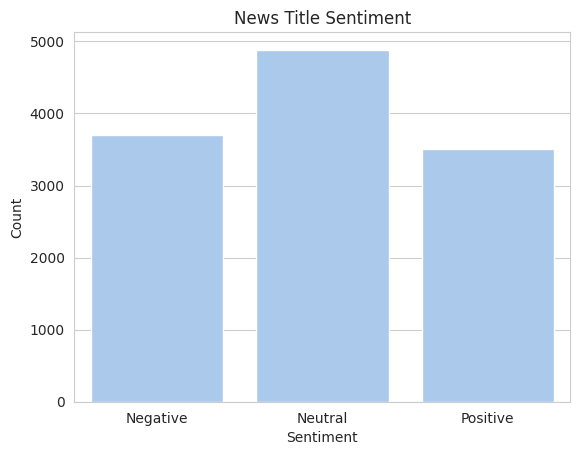

In [73]:
# Graph the sentiment result
sns.countplot(x = 'sentiment', data = news_result)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('News Title Sentiment')

### News Title Sentiment in User History

In [74]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Apply sentiment analysis using a lexicon
sia = SentimentIntensityAnalyzer()
sent['sentiment_score'] = sent['tokenized'].apply(lambda tokens: sia.polarity_scores(' '.join(tokens))['compound'])

# Classify sentiment based on the sentiment score
sent['sentiment'] = sent['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Create the result dataframe
sent_result = sent[['Title', 'sentiment_score', 'sentiment']]
sent_result

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Title,sentiment_score,sentiment
479255,Justin Bieber Reveals Where He Stands With Tay...,0.2023,Positive
871546,This Arctic blast is in its final day. But the...,0.0000,Neutral
232147,Are Democrats Willing to Pay More in Taxes for...,-0.1027,Negative
23759,100+ Funny White Elephant Gifts That'll Leave ...,0.8020,Positive
376817,Rachael Ray finally opens restaurant with no p...,0.0000,Neutral
...,...,...,...
519433,Harden-Westbrook argument goes viral,-0.3612,Negative
994914,Broadway Actress Laurel Griggs Dies at Age 13,0.0000,Neutral
962953,Two sisters raise thousands to buy 108 Thanksg...,0.0000,Neutral
396058,3 EU nations say Brexit talks likely to go bey...,0.0000,Neutral


Visualize the count of each sentiment in our sample.

Text(0.5, 1.0, 'News Title Sentiment')

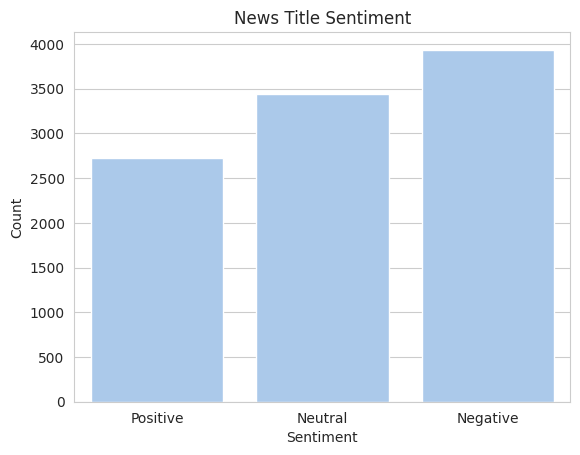

In [75]:
# Graph the sentiment result
sns.countplot(x = 'sentiment', data = sent_result)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('News Title Sentiment')

From the result we can see that in our sample, most of the news titles the users read are considered negative, aligning with the previous result. However, the result from the news dataset tells us that most of the news published (nearly half of the sample)have neutral titles. Therefore, we may find that people tend to click news with more negative titles.

# Reference:
Word2Vec: Optimal hyperparameters and their impact on natural language processing downstream tasks: https://www.degruyter.com/document/doi/10.1515/comp-2022-0236/html?lang=en

Wordcloud documentation: https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py

Clustering wit TF-IDF tutorial: https://medium.com/mlearning-ai/text-clustering-with-tf-idf-in-python-c94cd26a31e7